In [1]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

ERROR (theano.gpuarray): pygpu was configured but could not be imported or is too old (version 0.7 or higher required)
NoneType: None


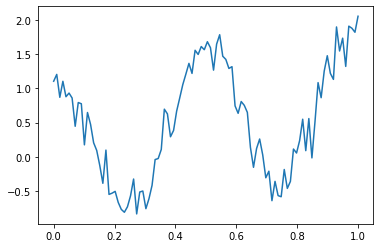

In [10]:
x = np.linspace(0,1,100)    
y =  x + np.cos(4*np.pi*x) + np.random.randn(len(x))*0.2
plt.plot(x,y)

In [11]:
#define  basis functions
def make_basis(x):
    # the components are 1,x, cos(2 \pi x), sin(2 \pi x)...
    #periodic = np.hstack([np.cos(2*np.pi*x),np.sin(2*np.pi*x),np.cos(4*np.pi*x),np.sin(4*np.pi*x),np.cos(6*np.pi*x),np.sin(6*np.pi*x),np.cos(8*np.pi*x),np.sin(8*np.pi*x),np.cos(10*np.pi*x),np.sin(10*np.pi*x),np.cos(12*np.pi*x),np.sin(12*np.pi*x)])
    periodic = np.hstack([np.cos(2*np.pi*x),np.cos(4*np.pi*x),np.cos(6*np.pi*x),np.cos(8*np.pi*x),np.cos(10*np.pi*x),np.cos(12*np.pi*x)])

    return np.hstack([np.ones((x.shape[0],1)), x, x**2, x**3, x**4, periodic ]) 

#  periodic basis starts at column:
col_per = 6



XX = x.reshape(-1,1)
H = make_basis(XX)
#normalize the data
yn = (y-np.mean(y))/np.std(y)

#select non periodic components of the basis
H_np = H[:, 0:col_per]

with pm.Model() as model:
    #prior
    w = pm.Normal('weights', mu=0, sd=50, shape=(H.shape[1],))
    sigma = pm.HalfCauchy('sigma', 5)

    # nonlinear
#     w1 = pm.Normal('w1', mu=0, sd=50, shape=(len(XX),))

#     w_tan = pm.Normal('tanh_weights', mu=0, sd=50)

#     tanh = pm.math.tanh(w_tan + pm.math.matrix_dot(XX.T, w1))

    #linear model
    line = pm.math.matrix_dot(H,w).T
    mu = pm.Deterministic('mu', line)

    #likelihood
    y_obs = pm.Normal('y', mu=mu, sd=sigma, observed=yn)

    #we can do  an approximated inference
with model:
    inference = pm.ADVI()
    approx = pm.fit(60000, method=inference)


posterior = approx.sample(draws=500)


Average Loss = 84.567: 100%|██████████| 60000/60000 [00:10<00:00, 5934.87it/s]
Finished [100%]: Average Loss = 84.563


In [ ]:
all_prediction = np.dot(H,posterior['weights'].T).T + np.tanh(posterior['tanh_weights'] + (XX * posterior['w1'].T)).T
#non_periodic_prediction = np.dot(H_np,posterior['weights'][:,0:col_per].T).T

plt.figure()
plt.plot(x,np.mean(all_prediction,axis=0),'r', label='Overall Mean')
#plt.plot(x,np.mean(non_periodic_prediction,axis=0),'b', label='Mean of the non-periodic comp.')
plt.legend()
plt.scatter(x,yn)
        

In [15]:
H.shape

(100, 6)

In [12]:
all_prediction = np.dot(H, posterior['weights'].T).T

non_periodic_prediction = np.dot(H_np, posterior['weights'][:,0:col_per].T).T

plt.figure()
plt.plot(x,np.mean(all_prediction,axis=0),'r', label='Overall Mean')
plt.plot(x,np.mean(non_periodic_prediction,axis=0),'b', label='Mean of the non-periodic comp.')
plt.legend()
plt.scatter(x,yn)

Gradients = []
for i in range(non_periodic_prediction.shape[0]):
    Gradients.append(np.min(np.gradient(non_periodic_prediction[i,:], x)))

posterior_probability_deriviative_is_positive = len(np.where(np.array(Gradients)>0)[0])/len(Gradients)
print("probability that the function is increasing=", posterior_probability_deriviative_is_positive)
if posterior_probability_deriviative_is_positive>0.95:
    print("YES")
else:
    print("NO")

probability that the function is increasing= 0.986
YES


In [39]:
#h = np.tanh(posterior['tanh_weights'] + x posterior['w1'].T)
h = np.tanh(np.dot(posterior['w1'], x.T))
h.shape

(500,)

In [27]:
np.dot(H, posterior['weights'].T).T.shape

(500, 100)

Average Loss = 80.311: 100%|██████████| 60000/60000 [00:10<00:00, 5900.43it/s]
Finished [100%]: Average Loss = 80.333


probability that the function is increasing= 0.0
NO


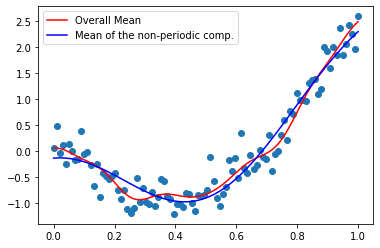

In [13]:
y =  x/2-2*np.exp(-(x-0.5)**2) + 2 + np.random.randn(len(x))*0.05

XX = x.reshape(-1,1)
H = make_basis(XX)
#normalize the data
yn = (y-np.mean(y))/np.std(y)

#select non periodic components of the basis
H_np = H[:, 0:col_per]

with pm.Model() as model:
    #prior
    w = pm.Normal('weights', mu=0, sd=50, shape=(H.shape[1],))
    sigma = pm.HalfCauchy('sigma', 5)

    # nonlinear
#     w1 = pm.Normal('w1', mu=0, sd=50, shape=(len(XX),))

#     w_tan = pm.Normal('tanh_weights', mu=0, sd=50)

#     tanh = pm.math.tanh(w_tan + pm.math.matrix_dot(XX.T, w1))

    #linear model
    line = pm.math.matrix_dot(H,w).T
    mu = pm.Deterministic('mu', line)

    #likelihood
    y_obs = pm.Normal('y', mu=mu, sd=sigma, observed=yn)

    #we can do  an approximated inference
with model:
    inference = pm.ADVI()
    approx = pm.fit(60000, method=inference)


posterior = approx.sample(draws=500)

all_prediction = np.dot(H, posterior['weights'].T).T

non_periodic_prediction = np.dot(H_np, posterior['weights'][:,0:col_per].T).T

plt.figure()
plt.plot(x,np.mean(all_prediction,axis=0),'r', label='Overall Mean')
plt.plot(x,np.mean(non_periodic_prediction,axis=0),'b', label='Mean of the non-periodic comp.')
plt.legend()
plt.scatter(x,yn)

Gradients = []
for i in range(non_periodic_prediction.shape[0]):
    Gradients.append(np.min(np.gradient(non_periodic_prediction[i,:], x)))

posterior_probability_deriviative_is_positive = len(np.where(np.array(Gradients)>0)[0])/len(Gradients)
print("probability that the function is increasing=", posterior_probability_deriviative_is_positive)
if posterior_probability_deriviative_is_positive>0.95:
    print("YES")
else:
    print("NO")

In [14]:
import theano as tt
y = x/2-2*np.exp(-(x-0.5)**2) + 2 + np.random.randn(len(x))*0.05

XX = x.reshape(-1,1)
H = make_basis(XX)
#normalize the data
yn = (y-np.mean(y))/np.std(y)

#select non periodic components of the basis
H_np = H[:, 0:col_per]

with pm.Model() as model:
    #prior
    w = pm.Normal('weights', mu=0, sd=50, shape=(H.shape[1],))
    sigma = pm.HalfCauchy('sigma', 5)

    # nonlinear
    def tan_function(x):
        return tt.tanh(x)
#     w1 = pm.Normal('w1', mu=0, sd=50, shape=(len(XX),))

#     w_tan = pm.Normal('tanh_weights', mu=0, sd=50)

#     tanh = pm.math.tanh(w_tan + pm.math.matrix_dot(XX.T, w1))

    #linear model
    line = pm.math.matrix_dot(H,w).T
    tan_line = pm.gp.cov.ScaledCov(1, line, tan_function)

    mu = pm.Deterministic('mu', tan_line)

    #likelihood
    y_obs = pm.Normal('y', mu=mu, sd=sigma, observed=yn)

    #we can do  an approximated inference
with model:
    inference = pm.ADVI()
    approx = pm.fit(60000, method=inference)


posterior = approx.sample(draws=500)

all_prediction = np.dot(H, posterior['weights'].T).T

non_periodic_prediction = np.dot(H_np, posterior['weights'][:,0:col_per].T).T

plt.figure()
plt.plot(x,np.mean(all_prediction,axis=0),'r', label='Overall Mean')
plt.plot(x,np.mean(non_periodic_prediction,axis=0),'b', label='Mean of the non-periodic comp.')
plt.legend()
plt.scatter(x,yn)

Gradients = []
for i in range(non_periodic_prediction.shape[0]):
    Gradients.append(np.min(np.gradient(non_periodic_prediction[i,:], x)))

posterior_probability_deriviative_is_positive = len(np.where(np.array(Gradients)>0)[0])/len(Gradients)
print("probability that the function is increasing=", posterior_probability_deriviative_is_positive)
if posterior_probability_deriviative_is_positive>0.95:
    print("YES")
else:
    print("NO")

TypeError: Must be or inherit from the Covariance class